In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 1000)
import seaborn as sns
import unidecode

In [2]:
#Lendo dados
drogas_final = pd.read_csv('Dados/GESEG_SBX_DROGA_EXPORT.csv', encoding = 'latin-1', sep = ';', index_col=0)
#Pivotando valor "QUANTIDADE" da coluna "ATRIBUTOS" com o mesmo "NRO_INT_OBJETO"
drogas_final_pivot = drogas_final.pivot(index="NRO_INT_OBJETO", columns="ATRIBUTO", values="QUANTIDADE")
#Agrupando dados com o mesmo "K93_NRO_INT_OBJETO"
#Foi preciso utilizar "agg('min')" pois apenas groupby()...
#retorna um objeto iterável 
dg2_final = drogas_final[['NRO_INT_OBJETO','ANO_OCOR', 'NRO_OCOR','NRO_INT_TIPO_OBJETO','TIPO_OBJETO','ATRIBUTO']].groupby(["NRO_INT_OBJETO"]).min()
#Ordenando por "K93_NRO_INT_OBJETO"
dg2_final_sorted = dg2_final.sort_values(by=['NRO_INT_OBJETO'])
drogas_pivot_final_sorted = drogas_final_pivot.sort_values(by=['NRO_INT_OBJETO'])

In [3]:
#Concatenando as duas tabelas
try_1_final = pd.concat([dg2_final_sorted, drogas_pivot_final_sorted],axis=1)
#Atribuindo a tabela resultado "try_1" com um index numérico
resultado = try_1_final.reset_index()
#Renomeando Coluans
resultado = resultado.rename(columns={"NRO_INT_OBJETO": "CHAVE_OBJETO", "TIPO_OBJETO": "TXT_TIPO_OBJETO"})

In [4]:
def ajusta_texto_numerico(texto):
    return str(texto).replace('.', '').replace(',', '.')

resultado['Peso Unitário'] = resultado['Peso Unitário'].apply(ajusta_texto_numerico)
resultado['Peso Total'] = resultado['Peso Total'].apply(ajusta_texto_numerico)

resultado['Peso Unitário'] = pd.to_numeric(resultado['Peso Unitário'], errors='coerce',downcast="float").fillna(0).astype(float)
resultado['Peso Total'] = pd.to_numeric(resultado['Peso Total'], errors='coerce',downcast="float").fillna(0).astype(float)

In [5]:
#Criando DF cores a partir de frequência do tipo do Objeto
cores = resultado['TXT_TIPO_OBJETO'].value_counts()
cores = pd.DataFrame(cores)
cores = cores.reset_index()
cores = cores.T
cores = cores.rename(columns={0:cores[0][0],1:cores[1][0],2:cores[2][0],3:cores[3][0]})
cores = cores.iloc[1:]

#Criando DF cores1 com as frequências
cores1 = resultado['TXT_TIPO_OBJETO'].value_counts(normalize=True)
cores1 = pd.DataFrame(cores1)
cores1 = cores1.reset_index()
cores1 = cores1.T
cores1 = cores1.rename(columns={0:cores1[0][0],1:cores1[1][0],2:cores1[2][0],3:cores1[3][0][0]
                             })
#Concatenado DF para cores2
lista = [cores,cores1]
cores2 = pd.concat(lista)
cores2 = cores2.reset_index(drop=True)
cores2 = cores2.drop([1], axis = 0)
cores2 = cores2.rename(index={0:'Quantidade', 2:"Frequencias"})
#Atribuindo a coluna Crack também as frequências de C
#Não foi atribuido também Quantidade pois retornava um valor NaN
cores2['Crack']['Frequencias'] = cores2['C']['Frequencias']
cores2 = cores2.drop(['C'], axis = 1)
cores2

,Maconha,Drogas,Cocaína,Crack
Quantidade,41164,37528,20063,14476
Frequencias,0.36354,0.331429,0.177186,0.127845


Text(0.5, 1.0, 'Tipo de Objeto')

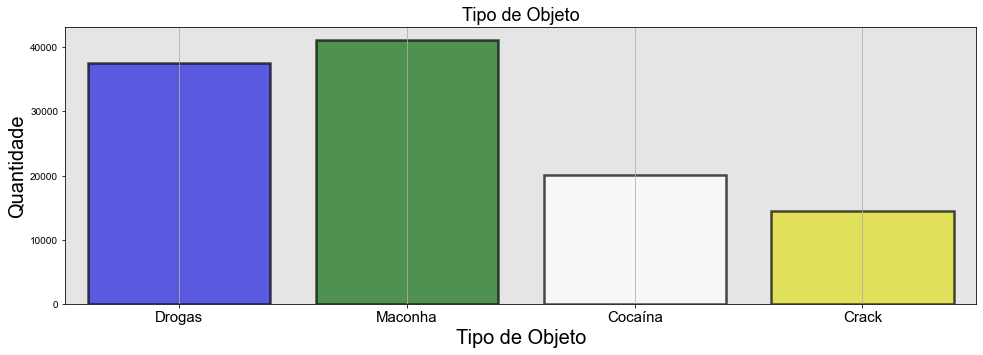

In [6]:
#Plotando gráficos
stores_df = resultado

palette ={"Maconha": "green", "Cocaína": "white", "Crack": "yellow", "Drogas": "blue"}
f, (ax3) = plt.subplots(1, 1, figsize=(14, 5))
sns.set(font_scale=1.5)

sns.countplot(x="TXT_TIPO_OBJETO", data=stores_df, ax=ax3, palette= palette, alpha = 0.7, linewidth=2.5, edgecolor=".0")
ax3.set_facecolor('#ababab')
ax3.patch.set_alpha(0.3)
ax3.set_xlabel("Tipo de Objeto",fontsize=20)
ax3.set_ylabel("Quantidade",fontsize=20)
ax3.set_xticklabels(ax3.get_xmajorticklabels(), fontsize = 15)
plt.grid(axis='x')
plt.tight_layout()
plt.title('Tipo de Objeto')

In [7]:
#Definindo uma series Drogas
#Como resultado do tipo de objeto de resultado = Drogas
Drogas = resultado.loc[resultado['TXT_TIPO_OBJETO'] == 'Drogas']

Drogas = resultado.loc[resultado['TXT_TIPO_OBJETO'] == 'Drogas']
Outras = resultado.loc[resultado['TXT_TIPO_OBJETO'] != 'Drogas']
Outras = Outras.reset_index(drop= True)

#DF com descrição nula
DrogasNA = Drogas.loc[Drogas['Descrição'].isnull()]
DrogasNA = DrogasNA.reset_index(drop=True)

#Excluindo descrição nula do DF Drogas
Drogas = Drogas.loc[Drogas['Descrição'].notna()]
Drogas = Drogas.reset_index(drop=True)

In [8]:
def changer(txt):
    return unidecode.unidecode(str(txt).replace(',','').replace('.',''))

Drogas['Descrição'] = Drogas['Descrição'].apply(changer)
    
Drogas['Descrição'] = Drogas['Descrição'].str.lower()

In [9]:
#Tratando ajustes de drogas
def analizer(x):
    
    if 'maconha' in x:
        return 'Maconha'
    elif 'canabis' in x:
        return 'Maconha'
    elif 'cannabis' in x:
        return 'Maconha'
    elif 'crack' in x:
        return 'Crack'
    elif 'cocaina' in x:
        return 'Cocaína'
    else:
        return 'Drogas'
    
Drogas['RECLASSIFICAÇÃO'] = Drogas['Descrição'].apply(analizer)

In [10]:
listaDrogas = [Drogas, DrogasNA]
Drogas = pd.concat(listaDrogas)

stores_df = Drogas

Text(0.5, 1.0, 'Tipo de Objeto')

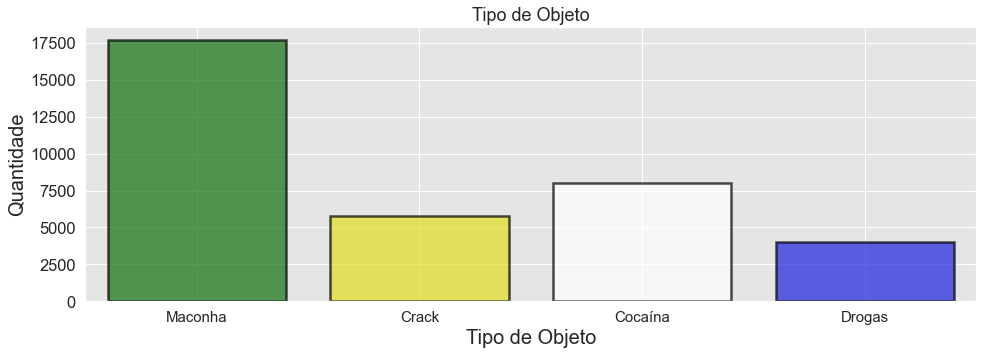

In [11]:
#Plotando Reclassificado
palette ={"Maconha": "green", "Cocaína": "white", "Crack": "yellow", "Drogas": "blue"}
f, (ax3) = plt.subplots(1, 1, figsize=(14, 5))
sns.set(font_scale=1.5)

sns.countplot(x="RECLASSIFICAÇÃO", data=stores_df, ax=ax3, palette= palette, alpha = 0.7, linewidth=2.5, edgecolor=".0")
ax3.set_facecolor('#ababab')
ax3.patch.set_alpha(0.3)
ax3.set_xlabel("Tipo de Objeto",fontsize=20)
ax3.set_ylabel("Quantidade",fontsize=20)
ax3.set_xticklabels(ax3.get_xmajorticklabels(), fontsize = 15)

plt.grid(axis='x')
plt.tight_layout()
plt.title('Tipo de Objeto')

In [12]:
#DF cores com as drogas
cores = Drogas['RECLASSIFICAÇÃO'].value_counts()
cores = pd.DataFrame(cores)
cores = cores.reset_index()
cores = cores.T
cores = cores.rename(columns={0:cores[0][0],1:cores[1][0],2:cores[2][0],3:cores[3][0]})
cores = cores.iloc[1:]

#Frequência das drogas
cores1 = Drogas['RECLASSIFICAÇÃO'].value_counts(normalize=True)
cores1 = pd.DataFrame(cores1)
cores1 = cores1.reset_index()
cores1 = cores1.T
cores1 = cores1.rename(columns={0:cores1[0][0],1:cores1[1][0],2:cores1[2][0],3:cores1[3][0][0]
                             })
#Concatenando DF
lista = [cores,cores1]
cores2 = pd.concat(lista)
cores2 = cores2.reset_index(drop=True)
cores2 = cores2.drop([1], axis = 0)
cores2 = cores2.rename(index={0:'Quantidade', 2:"Frequencia"})
cores2['Drogas']['Frequencia'] = cores2['D']['Frequencia']
cores2 = cores2.drop(['D'], axis = 1)
cores2


,Maconha,Cocaína,Crack,Drogas
Quantidade,17710,7999,5806,3999
Frequencia,0.498677,0.225235,0.163485,0.112603


In [13]:
#Concatenando DF Drogas com DF outros
resultado_final = pd.concat([Drogas, Outras])

#Tratando NaN de reclassificação
resultado_final['RECLASSIFICAÇÃO'] = resultado_final['RECLASSIFICAÇÃO'].fillna(value=resultado_final.TXT_TIPO_OBJETO)

#Definindo a chave do objeto como indice
resultado_final = resultado_final.set_index('CHAVE_OBJETO')

In [14]:
#Definindo dados a serem analizados pela reclassificação
analizes = Drogas.loc[Drogas['RECLASSIFICAÇÃO'] == 'Drogas']

#A serem exportados
analizes_export = analizes[['CHAVE_OBJETO','Cor Predominante','Descrição','Peso Total','Peso Unitário','Tipo de Embalagem','RECLASSIFICAÇÃO']]

In [15]:
analizes_export = analizes_export.set_index('CHAVE_OBJETO')

In [16]:
#analizes_export.to_csv('Dados/Analize_Reclassificacao_Igual_A_Drogas_OK.csv')

In [17]:
#resultado_final.to_csv('Dados/Drogas_Reclassificadas_completa_OK.csv', sep=';', decimal=",", float_format='%.2f', quoting=csv.QUOTE_NONNUMERIC)